In [1]:
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np 
import rasterio 

In [2]:
img_path="/home/kratee/Downloads/projectData/"
img_anlz = sorted(glob.glob(img_path + 'LC08_L2SP_136042_*.TIF'))

In [3]:
#open and read all images
img_2015 = [] 
for file in img_anlz[:3]:
# Read band
    src = rasterio.open(file) 
    band = src.read(1).astype('float64')
             # Append to list
    img_2015.append(band)
    
img_2016 = [] 
for file in img_anlz[3:]:
# Read band
    src = rasterio.open(file) 
    band = src.read(1).astype('float64')
             # Append to list
    img_2016.append(band)

In [4]:
#define nir,red and swir bands
nir_pre=img_2015[1]
red_pre=img_2015[0]
swir_pre=img_2015[2]

nir_post=img_2016[1]
red_post=img_2016[0]
swir_post=img_2016[2]

In [5]:
#calculate NDVI for 2015 and 2016
ndvi_pre=np.where(
    (nir_pre+red_pre)==0.,
    -0.2,
    (nir_pre-red_pre)/(nir_pre+red_pre)
)

ndvi_post=np.where(
    (nir_post+red_post)==0.,
    -0.4,
    (nir_post-red_post)/(nir_post+red_post)
)

/home/kratee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/kratee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


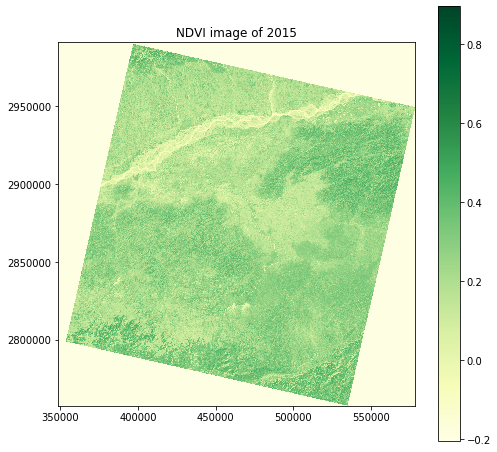

In [7]:
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
fig,ax=plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi_pre, extent=full_extent, cmap = 'YlGn')
ax.set_title("NDVI image of 2015")
fig.colorbar(im, orientation='vertical')
plt.show()

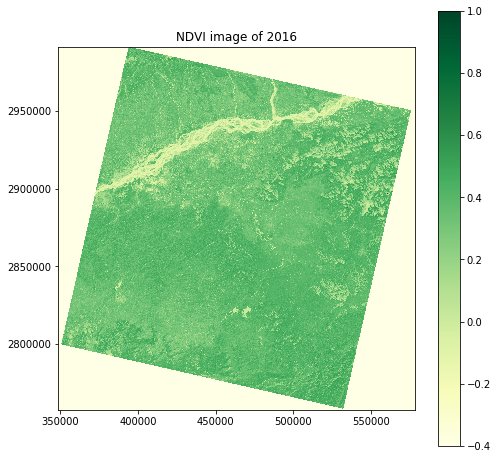

In [8]:
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi_post, extent=full_extent, cmap = 'YlGn')
ax.set_title("NDVI image of 2016")
fig.colorbar(im, orientation='vertical')
plt.show()

In [9]:
#calculate dNDVI
d_ndvi=ndvi_post-ndvi_pre

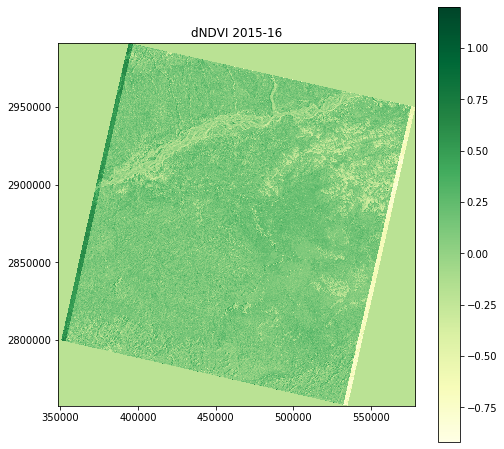

In [10]:
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(d_ndvi, extent=full_extent, cmap = 'YlGn')
ax.set_title("dNDVI 2015-16")
fig.colorbar(im, orientation='vertical')
plt.show()

In [5]:
# calculate NBR
nbr_pre=np.where(
    (nir_pre+swir_pre)==0.,
    -0.4,
    (nir_pre-swir_pre)/(nir_pre+swir_pre)
)

nbr_post=np.where(
    (nir_post+swir_post)==0.,
    -0.4,
    (nir_post-swir_post)/(nir_post+swir_post)
)

/home/kratee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/kratee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


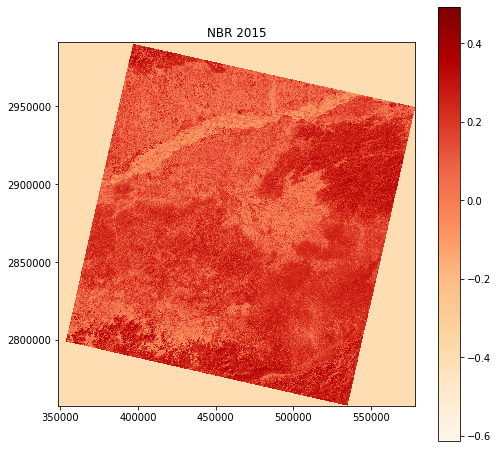

In [6]:
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbr_pre, extent=full_extent, cmap = 'OrRd')
ax.set_title("NBR 2015")
fig.colorbar(im, orientation='vertical')
plt.show()

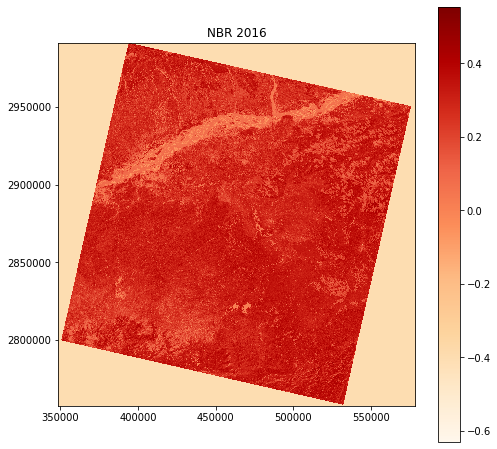

In [7]:
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbr_post, extent=full_extent, cmap = 'OrRd')
ax.set_title("NBR 2016")
fig.colorbar(im, orientation='vertical')
plt.show()

In [6]:
#dNBR
d_nbr=nbr_post-nbr_pre

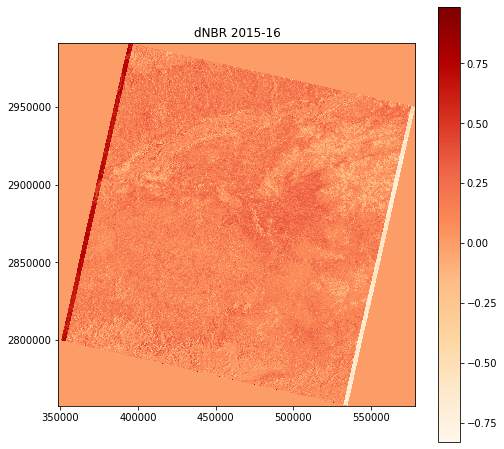

In [9]:
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(d_nbr, extent=full_extent, cmap = 'OrRd')
ax.set_title("dNBR 2015-16")
fig.colorbar(im, orientation='vertical')
plt.show()

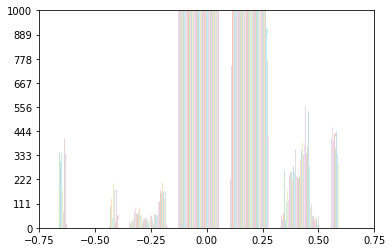

In [15]:
np.random.seed(1)
x = d_nbr

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(-0.75, 0.75), xticks=np.arange(-0.75, 1, 0.25),
       ylim=(0,1000), yticks=np.linspace(0, 1000, 10))

plt.show()